# **CNN Architecture:**
 Welcome to the CNN Architecture notebook, your go-to resource for understanding Convolutional Neural Networks (CNNs). From the basics to advanced concepts, we cover it all in this concise guide. Get ready to unravel the power of CNNs in image recognition, object detection, and more!

In [45]:
# Import necessary libraries
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
from keras.datasets import cifar100
from keras.optimizers import Adam
from keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

# **Download Dataset**
The CIFAR (Canadian Institute For Advanced Research) dataset is a popular benchmark in machine learning and computer vision. It consists of two datasets:

CIFAR-10: 60,000 32x32 color images in 10 classes, with 6,000 images per class.
CIFAR-100: 60,000 32x32 color images in 100 classes, with 600 images per class.
Each dataset is divided into 50,000 training images and 10,000 test images.

Classes
CIFAR-10: Airplane, Automobile, Bird, Cat, Deer, Dog, Frog, Horse, Ship, Truck


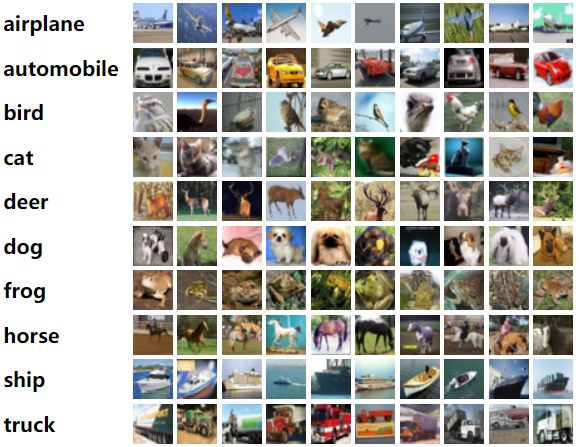

In [46]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

In [62]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
datagen.fit(x_train)  # Assuming train_images is your training data

### Display Sample Images with Class Labels

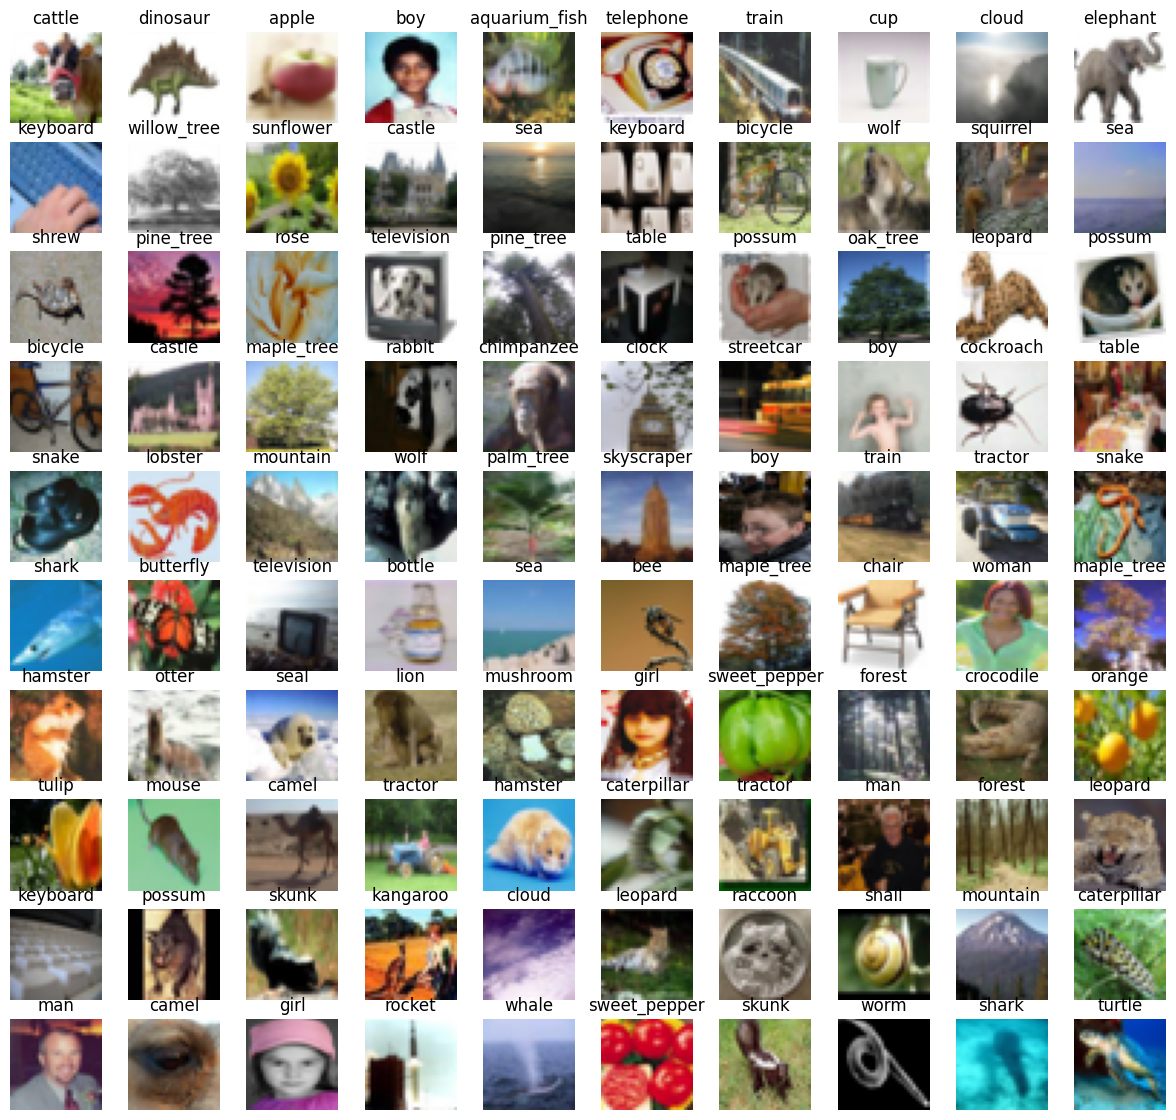

In [47]:
# Define the class labels
class_labels = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed',
                      'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy',
                      'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle',
                      'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
                      'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup',
                      'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest',
                      'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
                      'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard',
                      'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
                      'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid',
                      'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
                      'plain', 'plate', 'poppy', 'porcupine', 'possum',
                      'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
                      'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper',
                      'snail', 'snake', 'spider', 'squirrel', 'streetcar',
                      'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone',
                      'television', 'tiger', 'tractor', 'train', 'trout',
                      'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree',
                      'wolf', 'woman', 'worm']

# Initialize the figure and subplots
fig, axes = plt.subplots(10, 10, figsize=(15, 14))

# Iterate through the first 10 images
for i, ax in enumerate(axes.flat):
    # Select the image and label
    image, label = x_train[i], y_train[i]

    # Display the image
    ax.imshow(image, cmap='gray')

    # Set the title with the class label
    ax.set_title(f"{class_labels[label.item()]}")
    ax.axis('off')

# Display the figure
plt.show()

In [48]:
#transforming the training dataset
x_train = x_train.reshape(len(x_train),3,32,32).transpose(0,2,3,1)
x_train.shape

(50000, 32, 32, 3)

In [49]:
#transforming the testing dataset
x_test = x_test.reshape(len(x_test),3,32,32).transpose(0,2,3,1)
x_test.shape

(10000, 32, 32, 3)

In [50]:
# Convert class vectors to binary class matrices / one-hot encoding
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

In [51]:
# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [26]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### Define CNN Architecture

In [54]:
# Define the CNN model
model = Sequential()

#Stack 1
#convolution

# Conv2D layer with 128 filters, kernel size 3x3, input shape (32, 32, 3)
# Input size: 32x32x3, Kernel size: 3x3, Number of kernels: 32, Output size: 30x30x32. [input_size-kernel]+1
model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(32, 32, 3)))
# Normalization
model.add(BatchNormalization())
# MaxPooling2D layer with pool size 2x2
# Output size: 15x15x32
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))

#model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

#Stack 2
#convolution

# Conv2D layer with 256 filters, kernel size 3x3
# Input size: 15x15x32, Kernel size: 3x3, Number of kernels: 64, Output size: 13x13x64
model.add(Conv2D(256, (3, 3), activation='relu'))
# Normalization
model.add(BatchNormalization())
# MaxPooling2D layer with pool size 2x2
# Output size: 6x6x64
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))
# Conv2D layer with 128 filters, kernel size 3x3
# Input size: 6x6x64, Kernel size: 3x3, Number of kernels: 64, Output size: 4x4x64

#Stack 3
#convolution

model.add(Conv2D(512, (3, 3), activation='relu'))
# Normalization
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

# Flatten layer
# Output size: 1024
model.add(Flatten())

#full connection
# Dense layer with 64 units
# Input size: 1024, Output size: 64
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
# Normaization
model.add(BatchNormalization())
# Dense layer with 10 units (output layer)
# Input size: 128, Output size: 100

model.add(Dense(100, activation='softmax'))

In [55]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 30, 30, 128)    │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 30, 30, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 13, 13, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 13, 13, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 4, 4, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1000)           │     2,049,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 1000)           │         4,000 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │       100,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,635,596 (13.87 MB)

 Trainable params: 3,631,804 (13.85 MB)

 Non-trainable params: 3,792 (14.81 KB)

# **Parameters in ANN on Cifar-10**
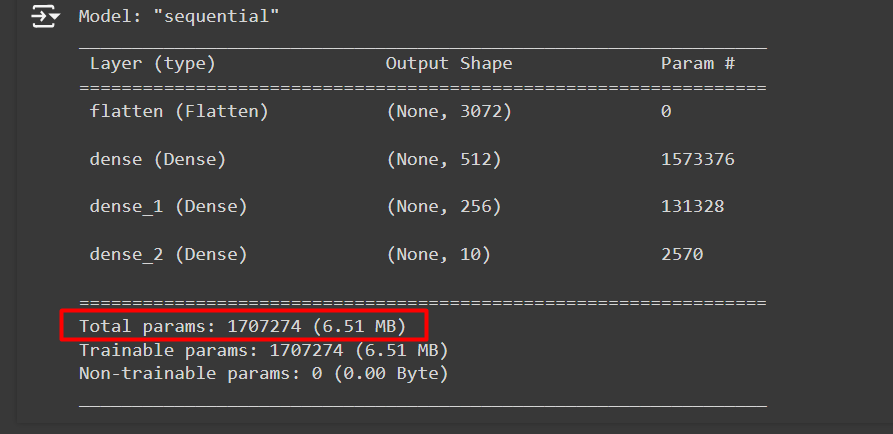

In [56]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#other optimizer SGD, RMSprop, Adadelta, Adagrad, Adamax etc
# other loss functions are mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, mean_squared_logarithmic_error, binary_crossentropy


In [59]:
#early stopping to monitor the validation loss and avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
#saving the model checkpoint for the best model
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', mode='min', save_best_only=True, verbose=1)

In [60]:
#image augmentation to expand the training dataset
#validation split to test the model
data_gen = ImageDataGenerator(
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
featurewise_center=True,
width_shift_range=0.1,
validation_split=0.2)
data_gen.fit(x_train, seed=123)

train_data_gen = data_gen.flow(x_train, y_train,
batch_size=64,
subset="training", seed=123)

valid_data_gen = data_gen.flow(x_train, y_train,
batch_size=64,
subset="validation", seed=123)

In [61]:
# Train the model
model.fit(x_train, y_train, batch_size=64, epochs=10, callbacks=[early_stop, model_checkpoint],
          validation_data=(x_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.0253 - loss: 5.0464
Epoch 1: val_loss improved from inf to 4.18588, saving model to best_model.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 264s 334ms/step - accuracy: 0.0253 - loss: 5.0462 - val_accuracy: 0.0761 - val_loss: 4.1859
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step - accuracy: 0.0549 - loss: 4.5179
Epoch 2: val_loss improved from 4.18588 to 4.00647, saving model to best_model.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 268s 343ms/step - accuracy: 0.0549 - loss: 4.5178 - val_accuracy: 0.0955 - val_loss: 4.0065
Epoch 3/10
665/782 ━━━━━━━━━━━━━━━━━━━━ 38s 330ms/step - accuracy: 0.0816 - loss: 4.2330

KeyboardInterrupt: 

In [31]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print('Test accuracy:', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3745 - loss: 2.5391
Test accuracy: 0.37720000743865967


In [32]:
# Evaluate the model
loss, accuracy = model.evaluate(x_train, y_train)
print('Train accuracy:', accuracy)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6664 - loss: 1.3540
Train accuracy: 0.6711599826812744


In [34]:
pred = model.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


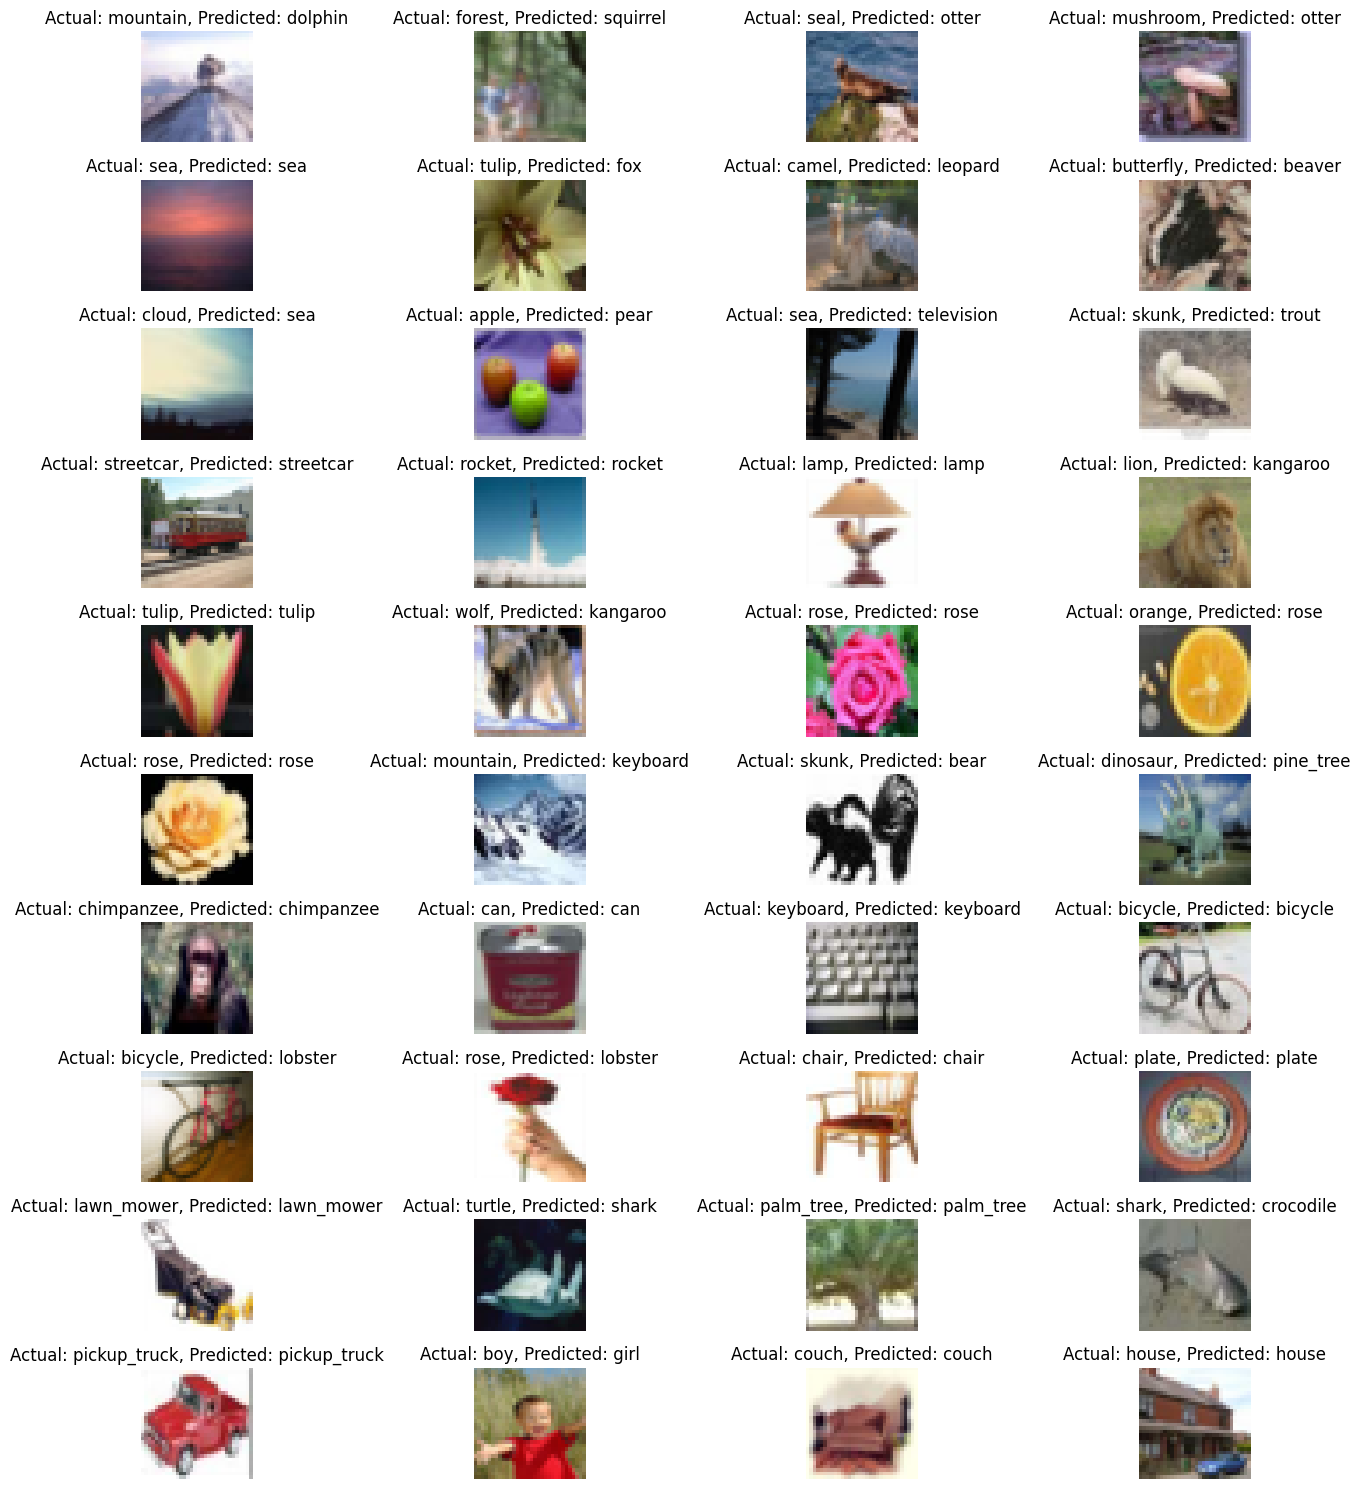

In [35]:
num_images_to_display = 40
num_columns = 4
num_rows = (num_images_to_display + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 15))
for i, ax in enumerate(axes.flat):
    if i < num_images_to_display:
        ax.imshow(x_test[i])
        actual_label = class_labels[np.argmax(y_test[i])]
        predicted_label = class_labels[np.argmax(pred[i])]
        ax.set_title(f"Actual: {actual_label}, Predicted: {predicted_label}")
        ax.axis('off')
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()
